IST664/CIS668 - Homework 2 (assigned in Week 4)

Originality assertion: All of the text and comments in this file are my original work (except for template items written by the instructor). All of the code in this file is my work, except where I give credit to another source. By adding my name below, I affirm this originality assertion.

#My name: Shubham Sharma #


Note to students: You may freely use code from the labs for this class without the need for attributions. 

Not many articles were found on my firstname and lastname. So, I decided to compare two legendary Argentine footballers: Lionel Messi and Diego Maradona. 

I got more text in these articles rather than using articles related to my firstname or lastname.

# Processing First wikipedia article

**Task 1: Use Beautiful Soup**

In [1]:
# Import Beautiful Soup for its web scraping capabilities
import bs4 as bs
import urllib.request # For retrieving from web pages
import re # Regular expressions
import spacy

In [2]:
# Change this URL to a Wikipedia article of your choice
wiki_url_1 = 'https://en.wikipedia.org/wiki/Lionel_Messi'

scraped_data = urllib.request.urlopen(wiki_url_1)

type(scraped_data) # A response object for a web page


http.client.HTTPResponse

In [3]:
# Now extract the text from the article and organize into paragraphs
article = scraped_data.read() # Extract the data from the response object

parsed_article = bs.BeautifulSoup(article,'lxml') # Use lxml as the back end parser

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

len(article_text)

124714

In [4]:
article_text

'\nArgentine professional footballer\nFilms\nLionel Andrés Messi[note 1] (Spanish pronunciation:\xa0[ljoˈnel anˈdɾes ˈmesi] (listen); born 24 June 1987), also known as Leo Messi, is an Argentine professional footballer who plays as a forward for  Ligue 1 club Paris Saint-Germain and captains the Argentina national team. Often considered the best player in the world and widely regarded as one of the greatest players of all time, Messi has won a record seven Ballon d\'Or awards,[note 2] a record six European Golden Shoes, and in 2020 was named to the Ballon d\'Or Dream Team. Until leaving the club in 2021, he had spent his entire professional career with Barcelona, where he won a club-record 35 trophies, including ten La Liga titles, seven Copa del Rey titles and four UEFA Champions Leagues. A prolific goalscorer and creative playmaker, Messi holds the records for most goals in La Liga (474), a La Liga and European league season (50), most hat-tricks in La Liga (36) and the UEFA Champion

**Task 2: Use RegEx to remove Wikipedia References and Extra Space**

In [5]:
# Put your code for task 2 here
line = article_text.strip()
new_line = re.sub("\[[0-9]+\]", '', line)
article_text = re.sub("\s+", " ", new_line)

**Task 3: Tokenize with spaCy**

In [6]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

my_article = nlp(article_text)

len(my_article) # Length in tokens

23819

In [7]:
# Here's one way to work with individual sentences:
my_spans = list(my_article.sents)

my_spans[0] # Let's view just the first sentence

Argentine professional footballer Films Lionel Andrés

**Task 4: Use displaCy to Show a Dependency Diagram for the First Sentence**

In [8]:
# Put your code for task 4 here
from spacy import displacy
displacy.render(my_spans[0], jupyter = True)

**Task 5: Find all of the Root Verbs**

Make a sentence by sentence list of all of the root verbs.

In [9]:
root_verbs = []
for i in range(len(my_spans)):
  root_verbs.append(my_spans[i].root.text)


print(f"We have {len(root_verbs)} root verbs.")

print(f"Here is a sentence by sentence list of all of the root verbs: {' '.join(root_verbs)}")

We have 777 root verbs.
Here is a sentence by sentence list of all of the root verbs: Argentine Messi[note born considered spent holds holds scored relocated established followed set finished assumed signed is won drew became led reversed see endorsed was was awarded became born is developed joined affected think 's realise shares joined scored threatened agreed scouted was best seen sought was issued relocated fielded struggled suffered enrolled befriended became was known took received seemed coach progressed played was destroyed got dribble were was made impressed told befriended joined helped reflected made played was returned finished was called moved made was played scored won seen praises signed made came gave came was updated missed established play " ended worked was established scored kept were came scored reflected proved scored collected saw failed became voted marred returned fielded finished were given signed remained implemented remained saw scored played played set play

**Task 6: Conduct a Frequency Analysis of the Root Verbs**

In [10]:
# Put your code for task 6 here
from nltk import FreqDist
fdist_roots = FreqDist(root_verbs)

print(f"The most common root verb is: {fdist_roots.max()}")
print("\n")

top_roots = fdist_roots.most_common(10)
for root in top_roots:
  print(f"The root verb \"{root[0]}\" occurred {root[1]} times.")

The most common root verb is: scored


The root verb "scored" occurred 80 times.
The root verb "was" occurred 54 times.
The root verb "is" occurred 21 times.
The root verb "became" occurred 18 times.
The root verb "finished" occurred 16 times.
The root verb "made" occurred 16 times.
The root verb "played" occurred 14 times.
The root verb "won" occurred 11 times.
The root verb "signed" occurred 10 times.
The root verb "came" occurred 8 times.


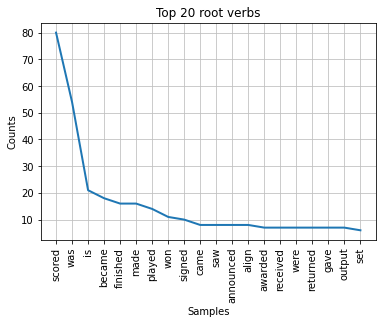

In [11]:
fdist_roots.plot(20, cumulative = False, title = "Top 20 root verbs")

**Task 7: Find the Subjects of Each Sentence**

Make a sentence by sentence list of the subjects of each sentence.

In [12]:
subjects = []

for i in range(len(my_spans)):
  for tok in my_spans[i]:
    if tok.dep_ == "nsubj":
      subjects.append(tok.text)

print(f"We have {len(subjects)} subjects in {len(my_spans)} sentences.")

print(f"Here is a sentence by sentence list of the subjects of each sentence.: {' '.join(subjects)}")

We have 1201 subjects in 777 sentences.
Here is a sentence by sentence list of the subjects of each sentence.: pronunciation who Messi he he goalscorer Messi He Messi Messi he debut He he Barcelona Messi seasons Messi him he seasons Messi Messi he he international Messi he style who Messi he he he achievement him Messi he Messi Messi who he he Leo both he influence who he you you kid He he you he he coach supporter Messi he he he insurance which Newell he they idol Messi I family they Rexach board it clubs Barcelona Rexach family they Messi he he teammates he he mother he he Fàbregas Messi he who he he he Fàbregas he It he Messi he he Messi Giuly Leo He They he He backs He Messi team he performance he he old Ronaldinho he which Messi He which he clause He he who he he B He Messi players Ronaldinho Rijkaard him Messi he player he He Barcelona I Capello Messi It him clause breakthrough he Capello bid who it club he Messi he he He which We he season he Messi League He he he Barcelona Mess

**Task 8: Conduct a Frequency Analysis of the Subjects**

In [13]:
# Put your code for task 8 here

fdist_subjects = FreqDist(subjects)

print(f"The most common subject is: {fdist_subjects.max()}")
print("\n")

top_roots = fdist_subjects.most_common(10)
for root in top_roots:
  print(f"The subject \"{root[0]}\" occurred {root[1]} times.")

The most common subject is: Messi


The subject "Messi" occurred 282 times.
The subject "he" occurred 255 times.
The subject "He" occurred 60 times.
The subject "Barcelona" occurred 45 times.
The subject "which" occurred 37 times.
The subject "him" occurred 35 times.
The subject "who" occurred 32 times.
The subject "I" occurred 22 times.
The subject "they" occurred 20 times.
The subject "Argentina" occurred 18 times.


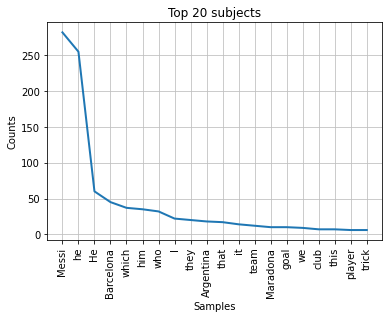

In [14]:
fdist_subjects.plot(20, cumulative = False, title = "Top 20 subjects")

**Task 9: Create Bigram Tokens Using Subject and Verb**

In [15]:
# Put your code for task 9 here
bigram = [' '.join(w) for w in zip(root_verbs, subjects)]

**Task 10: Conduct a Frequency Analysis of the Bigrams**

In [16]:
# Put your code for task 10 here

fdist_bigrams = FreqDist(bigram)

print(f"The most common bigram is: {fdist_bigrams.max()}")
print("\n")

top_roots = fdist_bigrams.most_common(10)
for root in top_roots:
  print(f"The bigram \"{root[0]}\" occurred {root[1]} times.")

The most common bigram is: scored Messi


The bigram "scored Messi" occurred 18 times.
The bigram "scored he" occurred 17 times.
The bigram "was he" occurred 16 times.
The bigram "was Messi" occurred 10 times.
The bigram "is Messi" occurred 7 times.
The bigram "scored He" occurred 5 times.
The bigram "became he" occurred 5 times.
The bigram "played he" occurred 5 times.
The bigram "made Messi" occurred 5 times.
The bigram "scored which" occurred 5 times.


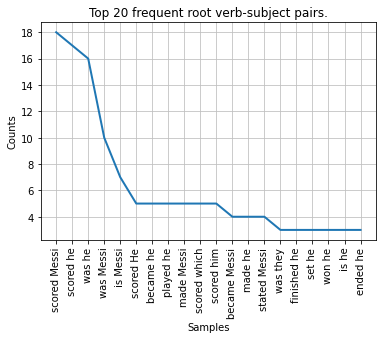

In [17]:
fdist_bigrams.plot(20, cumulative = False, title = "Top 20 frequent root verb-subject pairs.")

Don't forget to also process your second article in the same fashion as you did for the first one. Don't forget to put in a concluding paragraph with your observations comparing the two articles.

# Processing Second Wikipedia article.

In [18]:
# Change this URL to a Wikipedia article of your choice
wiki_url_1 = 'https://en.wikipedia.org/wiki/Diego_Maradona'

scraped_data = urllib.request.urlopen(wiki_url_1)

type(scraped_data) # A response object for a web page


http.client.HTTPResponse

In [19]:
# Now extract the text from the article and organize into paragraphs
article = scraped_data.read() # Extract the data from the response object

parsed_article = bs.BeautifulSoup(article,'lxml') # Use lxml as the back end parser

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

len(article_text)

75368

In [20]:
article_text

'\nArgentine professional footballer\nEponym\nFilms\nFamily\nRelated\nDiego Armando Maradona (Spanish:\xa0[ˈdjeɣo maɾaˈðona]; 30 October 1960\xa0– 25 November 2020) was an Argentine professional football player and manager. Widely regarded as one of the greatest players in the history of the sport, he was one of the two joint winners of the FIFA Player of the 20th Century award.[3][4] Maradona\'s vision, passing, ball control, and dribbling skills were combined with his small stature, which gave him a low centre of gravity allowing him to manoeuvre better than most other players. His presence and leadership on the field had a great effect on his team\'s general performance, while he would often be singled out by the opposition. In addition to his creative abilities, he possessed an eye for goal and was known to be a free kick specialist. A precocious talent, Maradona was given the nickname "El Pibe de Oro" ("The Golden Boy"), a name that stuck with him throughout his career.[5] He also

**Task 2: Use RegEx to remove Wikipedia References and Extra Space**

In [21]:
# Put your code for task 2 here
line = article_text.strip()
new_line = re.sub("\[[0-9]+\]", '', line)
article_text = re.sub("\s+", " ", new_line)

**Task 3: Tokenize with spaCy**

In [22]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

my_article = nlp(article_text)

len(my_article) # Length in tokens

14483

In [23]:
# Here's one way to work with individual sentences:
my_spans = list(my_article.sents)

my_spans[0] # Let's view just the first sentence

Argentine professional footballer Eponym Films Family Related Diego Armando Maradona (Spanish: [ˈdjeɣo maɾaˈðona]; 30 October 1960 – 25 November 2020) was an Argentine professional football player and manager.

**Task 4: Use displaCy to Show a Dependency Diagram for the First Sentence**

In [24]:
# Put your code for task 4 here
from spacy import displacy
displacy.render(my_spans[0], jupyter = True)

**Task 5: Find all of the Root Verbs**

Make a sentence by sentence list of all of the root verbs.

In [25]:
root_verbs = []
for i in range(len(my_spans)):
  root_verbs.append(my_spans[i].root.text)


print(f"We have {len(root_verbs)} root verbs.")

print(f"Here is a sentence by sentence list of all of the root verbs: {' '.join(root_verbs)}")

We have 530 root verbs.
Here is a sentence by sentence list of all of the root verbs: was was combined had possessed given had was played earned played scored was became was coached became announced arrived was was raised was has was struck asked were decided born left received spotted became amused named made entered kicked said remembered made scored spent received decided signed made played defeated had be had seemed were teammate won won dribbled ended granted had bout involved snapped got started mimicked headbutted surrounded brawled played injured stated got scored transferred arrived commented stated dominated was season elevated played won wrote broke turned defeated born painted dubbed win included assisted was asked stated increased continued faced faced retired renamed left signed played appeared played given scored made left played scored went stated is left are Cup did played played was were defeated renowned played fouled got captained asserted played came eliminated cem

**Task 6: Conduct a Frequency Analysis of the Root Verbs**

In [26]:
# Put your code for task 6 here
from nltk import FreqDist
fdist_roots = FreqDist(root_verbs)

print(f"The most common root verb is: {fdist_roots.max()}")
print("\n")

top_roots = fdist_roots.most_common(10)
for root in top_roots:
  print(f"The root verb \"{root[0]}\" occurred {root[1]} times.")

The most common root verb is: was


The root verb "was" occurred 50 times.
The root verb "played" occurred 16 times.
The root verb "had" occurred 15 times.
The root verb "is" occurred 11 times.
The root verb "said" occurred 10 times.
The root verb "scored" occurred 9 times.
The root verb "announced" occurred 9 times.
The root verb "won" occurred 9 times.
The root verb "stated" occurred 9 times.
The root verb "made" occurred 8 times.


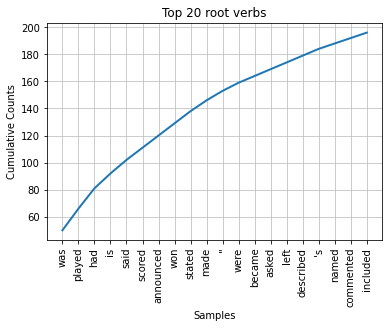

In [27]:
fdist_roots.plot(20, cumulative = True, title = "Top 20 root verbs")

**Task 7: Find the Subjects of Each Sentence**

Make a sentence by sentence list of the subjects of each sentence.

In [28]:
subjects = []

for i in range(len(my_spans)):
  for tok in my_spans[i]:
    if tok.dep_ == "nsubj":
      subjects.append(tok.text)

print(f"We have {len(subjects)} subjects in {len(my_spans)} sentences.")

print(f"Here is a sentence by sentence list of the subjects of each sentence.: {' '.join(subjects)}")

We have 813 subjects in 530 sentences.
Here is a sentence by sentence list of the subjects of each sentence.: Maradona he which him presence he that He who Maradona he he He he he Maradona he he that goal goal m Maradona He He Maradona He Maradona He that He He both father who Tota Diego he we we he he We he he he we he we they Maradona he He he He Maradona He Maradona that Maradona I I Cabrera I he He I he Maradona Maradona Maradona who him River Maradona He Maradona Boca Maradona Boca That He Maradona he ball I rest they We ourselves Barcelona Menotti Barcelona Maradona Maradona he he José José Maradona Maradona it him Barcelona Maradona He This Sola Maradona squad Goikoetxea rest players fans incident what executive I that I we Maradona Maradona Maradona Maradona Goldblatt They saviour newspaper we This he that what Maradona he he Maradona tensions Napoli Goldblatt celebrations series which Neapolitans prolific Napoli honours Maradona he Maradona who he Baresi it Maradona problems u

**Task 8: Conduct a Frequency Analysis of the Subjects**

In [29]:
# Put your code for task 8 here

fdist_subjects = FreqDist(subjects)

print(f"The most common subject is: {fdist_subjects.max()}")
print("\n")

top_roots = fdist_subjects.most_common(10)
for root in top_roots:
  print(f"The subject \"{root[0]}\" occurred {root[1]} times.")

The most common subject is: Maradona


The subject "Maradona" occurred 147 times.
The subject "he" occurred 137 times.
The subject "He" occurred 52 times.
The subject "I" occurred 37 times.
The subject "that" occurred 21 times.
The subject "who" occurred 18 times.
The subject "which" occurred 15 times.
The subject "it" occurred 15 times.
The subject "Argentina" occurred 14 times.
The subject "they" occurred 13 times.


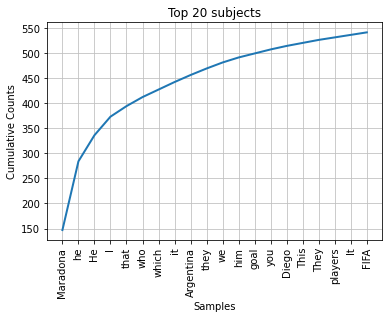

In [30]:
fdist_subjects.plot(20, cumulative = True, title = "Top 20 subjects")

**Task 9: Create Bigram Tokens Using Subject and Verb**

In [31]:
# Put your code for task 9 here
bigram = [' '.join(w) for w in zip(root_verbs, subjects)]

**Task 10: Conduct a Frequency Analysis of the Bigrams**

In [32]:
# Put your code for task 10 here

fdist_bigrams = FreqDist(bigram)

print(f"The most common bigram is: {fdist_bigrams.max()}")
print("\n")

top_roots = fdist_bigrams.most_common(10)
for root in top_roots:
  print(f"The bigram \"{root[0]}\" occurred {root[1]} times.")

The most common bigram is: was he


The bigram "was he" occurred 9 times.
The bigram "was Maradona" occurred 8 times.
The bigram "was He" occurred 5 times.
The bigram "was goal" occurred 5 times.
The bigram "played Maradona" occurred 5 times.
The bigram "announced he" occurred 3 times.
The bigram "had Maradona" occurred 3 times.
The bigram "described He" occurred 3 times.
The bigram "is Maradona" occurred 3 times.
The bigram "won he" occurred 3 times.


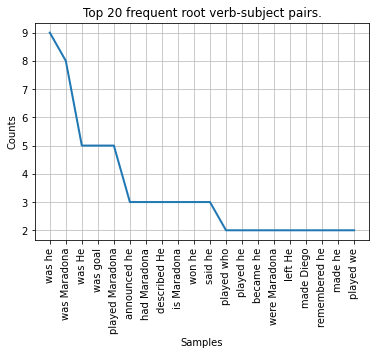

In [33]:
fdist_bigrams.plot(20, cumulative = False, title = "Top 20 frequent root verb-subject pairs.")

# Summary:

- I tried to analyze the Wikipedia articles of two professional footballers. 
In both the articles, we did semantic analysis by finding the root verbs and subjects after sentence tokenizing the article. 

- Since both are footballers, we see that "scored" and "played" are two of the top 10 frequent root verbs in the sentences. 

- For Diego Maradona, most common root verb is "was". It is because he died last year.

- Since both are Argentinians, "Argentina" is one of the most frequent subject in the sentences for both the articles. 

- **By just looking at most frequent subjects, we can get an idea of who each article is about**.

- Looking at bigrams, we can easily tell which article are we referring to and what is being talked about. Even if we don't know the context, we can tell that articles are talking about two person named Messi and Maradona and they both play something and score goals.